In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
file = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\Bank Loan\Bank_Personal_Loan_Modelling.csv")

file.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
file.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
file.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
scale = StandardScaler()

file.iloc[:, 1:13] = scale.fit_transform(file.iloc[:, 1:13])

In [9]:
file.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,0
1,2,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,0
2,3,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,0
3,4,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,0
4,5,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1


In [10]:
corr = file.corr()

corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:>

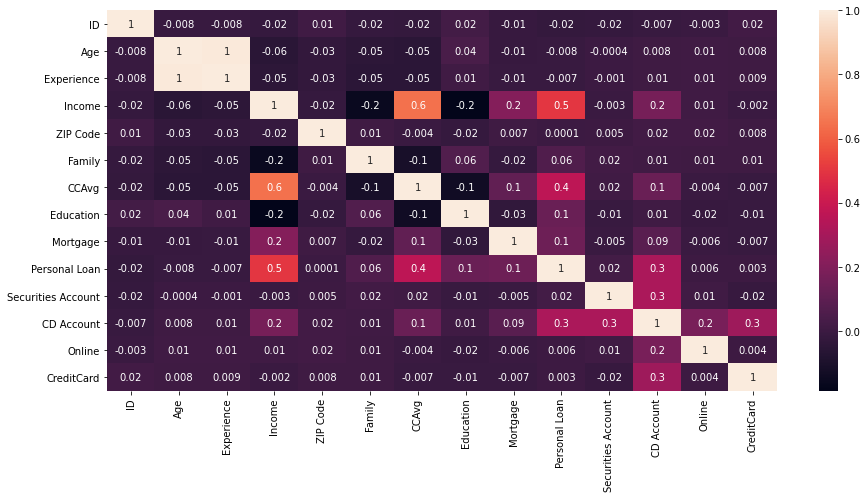

In [17]:
plt.figure(figsize=(15, 7))

sns.heatmap(corr, annot=True, fmt='.1g')

In [80]:
x = file.drop(['ID', 'CreditCard'], axis=1)

y = file['CreditCard']

In [81]:
report = sm.OLS(y, x).fit()

report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             CreditCard   R-squared (uncentered):                   0.073
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              32.88
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                    6.19e-74
Time:                        10:24:11   Log-Likelihood:                         -3843.9
No. Observations:                5000   AIC:                                      7712.
Df Residuals:                    4988   BIC:                                      7790.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0115      0.072     -0.161      0.872      -0.152       0.129
Experience             0.0138      0.072      0.193      0.847      -0.126       0.154
Income                 0.0020      0.011      0.186      0.853      -0.020       0.024
ZIP Code               0.0009      0.007      0.125      0.901      -0.014       0.015
Family                 0.0069      0.008      0.903      0.367      -0.008       0.022
CCAvg                 -0.0076      0.010     -0.776      0.438      -0.027       0.012
Education             -0.0032      0.008     -0.392      0.695      -0.019       0.013
Mortgage              -0.0116      0.008     -1.529      0.126      -0.026       0.003
Personal Loan         -0.0465      0.009     -4.948      0.000      -0.065      -0.028
Securities Account    -0.0584      0.008     -7.445      0.000      -0.074      -0.043
CD Account             0.1664      0.008     19.776      0.000       0.150       0.183
Online                -0.0266      0.008     -3.534      0.000      -0.041      -0.012
==============================================================================
Omnibus:                      970.372   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              875.713
Skew:                           0.943   Prob(JB):                    6.94e-191
Kurtosis:                       2.197   Cond. No.                         20.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
def vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF score'] = [variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
    return vif

vif(x)

,Features,VIF score
0,Age,93.756251
1,Experience,93.671067
2,Income,2.218811
3,ZIP Code,1.002655
4,Family,1.061295
5,CCAvg,1.736928
6,Education,1.199184
7,Mortgage,1.051450
8,Personal Loan,1.617776
9,Securities Account,1.125268


In [133]:
# x = file.drop(['ID', 'CreditCard'], axis=1)

x = file[['Income', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']]

y = file['CreditCard']

In [134]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [135]:
y_train.value_counts()

0    2805
1    1195
Name: CreditCard, dtype: int64

In [136]:
smote = SMOTE(sampling_strategy='minority', random_state=100)

x_train, y_train = smote.fit_sample(x_train, y_train)

In [137]:
y_train.value_counts()

1    2805
0    2805
Name: CreditCard, dtype: int64

In [138]:
Logistic = LogisticRegression()

Logistic.fit(x_train, y_train)

LogisticRegression()

In [139]:
Logistic.score(x_test, y_test)

0.608

In [140]:
print(metrics.classification_report(y_test, Logistic.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       725
           1       0.35      0.48      0.40       275

    accuracy                           0.61      1000
   macro avg       0.56      0.57      0.56      1000
weighted avg       0.65      0.61      0.62      1000



In [141]:
metrics.log_loss(y_test, Logistic.predict_proba(x_test))

0.6319010871733797

In [142]:
metrics.roc_auc_score(y_test, Logistic.predict(x_test))

0.5682758620689655

In [143]:
FPR, TPR, threshold = metrics.roc_curve(y_test, Logistic.predict(x_test))

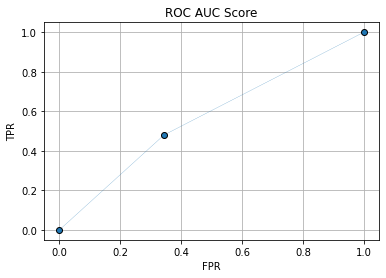

In [144]:
plt.plot(FPR, TPR, marker='o', linewidth=0.2, markeredgecolor='black')

plt.title("ROC AUC Score")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()